In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from env import host, user, password

import wrangle

In [2]:
# import raw telco data
raw_telco = wrangle.new_telco_data()

In [3]:
# Begin exploring
raw_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
raw_telco.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [5]:
# Use .describe with object columns.

obj_cols = raw_telco.columns[[raw_telco[col].dtype == 'O' for col in raw_telco.columns]]
for col in obj_cols:
    print(raw_telco[col].value_counts())
    print(raw_telco[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

0320-JDNQG    1
4512-ZUIYL    1
8515-OCTJS    1
2302-OUZXB    1
6171-ZTVYB    1
             ..
6243-OZGFH    1
9300-RENDD    1
4081-DYXAV    1
1492-QGCLU    1
4652-ODEVH    1
Name: customer_id, Length: 7043, dtype: int64
0320-JDNQG    0.000142
4512-ZUIYL    0.000142
8515-OCTJS    0.000142
2302-OUZXB    0.000142
6171-ZTVYB    0.000142
                ...   
6243-OZGFH    0.000142
9300-RENDD    0.000142
4081-DYXAV    0.000142
1492-QGCLU    0.000142
4652-ODEVH    0.000142
Name: customer_id, Length: 7043, dtype: float64
----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Nam

In [6]:
obj_cols = raw_telco.columns[[raw_telco[col].dtype == 'O' for col in raw_telco.columns]]
for col in obj_cols:
    print(raw_telco[col].describe())
    print('----------------------')

count           7043
unique          7043
top       0320-JDNQG
freq               1
Name: customer_id, dtype: object
----------------------
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
----------------------
count     7043
unique       2
top         No
freq      3641
Name: partner, dtype: object
----------------------
count     7043
unique       2
top         No
freq      4933
Name: dependents, dtype: object
----------------------
count     7043
unique       2
top        Yes
freq      6361
Name: phone_service, dtype: object
----------------------
count     7043
unique       3
top         No
freq      3390
Name: multiple_lines, dtype: object
----------------------
count     7043
unique       3
top         No
freq      3498
Name: online_security, dtype: object
----------------------
count     7043
unique       3
top         No
freq      3088
Name: online_backup, dtype: object
----------------------
count     7043
unique       3
top         No
fr

In [7]:
#Look at contract type value counts

raw_telco.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [8]:
# Confirm no overlap with contract type id and contract type

pd.crosstab(raw_telco.contract_type_id, raw_telco.contract_type, margins=True)

contract_type,Month-to-month,One year,Two year,All
contract_type_id,,,,
1,3875,0,0,3875
2,0,1473,0,1473
3,0,0,1695,1695
All,3875,1473,1695,7043


In [9]:
# Confrim no overlap with internet type id and internet type

pd.crosstab(raw_telco.internet_service_type_id, raw_telco.internet_service_type, margins=True)

internet_service_type,DSL,Fiber optic,None,All
internet_service_type_id,,,,
1,2421,0,0,2421
2,0,3096,0,3096
3,0,0,1526,1526
All,2421,3096,1526,7043


In [10]:
# Confirm no overlap with payment type and ID

pd.crosstab(raw_telco.payment_type_id, raw_telco.payment_type, margins=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
payment_type_id,,,,,
1,0,0,2365,0,2365
2,0,0,0,1612,1612
3,1544,0,0,0,1544
4,0,1522,0,0,1522
All,1544,1522,2365,1612,7043


In [11]:
# Confirm no nulls
raw_telco.isna().mean()

payment_type_id             0.0
internet_service_type_id    0.0
contract_type_id            0.0
customer_id                 0.0
gender                      0.0
senior_citizen              0.0
partner                     0.0
dependents                  0.0
tenure                      0.0
phone_service               0.0
multiple_lines              0.0
online_security             0.0
online_backup               0.0
device_protection           0.0
tech_support                0.0
streaming_tv                0.0
streaming_movies            0.0
paperless_billing           0.0
monthly_charges             0.0
total_charges               0.0
churn                       0.0
contract_type               0.0
internet_service_type       0.0
payment_type                0.0
dtype: float64

In [12]:
# Explore differences in payment type tenure

pd.crosstab(raw_telco.payment_type, raw_telco.tenure.mean())

col_0,32.371149
payment_type,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


In [13]:
# Explore differences in contract type tenure

pd.crosstab(raw_telco.contract_type, raw_telco.tenure.mean())

col_0,32.371149
contract_type,
Month-to-month,3875
One year,1473
Two year,1695


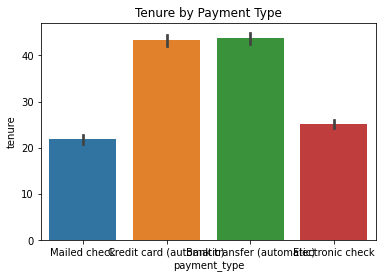

In [14]:
plt.title("Tenure by Payment Type")
sns.barplot(x="payment_type", y="tenure", data=raw_telco)
plt.show()

In [15]:
# Columns to drop: customer_id (can be added back later for predection), payment_type_id, 
# internet_service_type_id, contract_type_id, multiple_lines, online_security, online_backup, 
# device_protection, tech_support, streaming_tv, streaming_movies, paperless_billing

# Pass to prepare function which will return our train, validate, test data sets

wrangled_telco, train, validate, test = wrangle.clean_prep_telco(raw_telco)

In [16]:
wrangled_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   senior_citizen               7043 non-null   int64  
 1   partner                      7043 non-null   object 
 2   tenure                       7043 non-null   int64  
 3   monthly_charges              7043 non-null   float64
 4   total_charges                7043 non-null   object 
 5   churn                        7043 non-null   object 
 6   gender_Male                  7043 non-null   uint8  
 7   dependents_Yes               7043 non-null   uint8  
 8   phone_service_Yes            7043 non-null   uint8  
 9   contract_type_no_contract    7043 non-null   uint8  
 10  internet_service_type_Fiber  7043 non-null   uint8  
 11  internet_service_type_None   7043 non-null   uint8  
 12  payment_type_manual_payment  7043 non-null   uint8  
dtypes: float64(1), int

In [17]:
wrangled_telco["baseline_prediction"] = "No"

In [18]:
baseline_accuracy = (wrangled_telco.baseline_prediction == wrangled_telco.churn).mean()
print(f'Baseline Accuracy (Predicts did not churn): {baseline_accuracy:.2%}')

Baseline Accuracy (Predicts did not churn): 73.46%


In [19]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3943, 13)
(1691, 13)
(1409, 13)


In [20]:
# Contracts impact length of tenure.
# First start basic and verify mathematically that contract type is not independent of tenure
# Null Hypothesis - Contract type is independent of Churn

telco_contract_churn_observed = pd.crosstab(wrangled_telco.churn, wrangled_telco.contract_type_no_contract)

In [21]:
chi2, p, degf, expected = stats.chi2_contingency(telco_contract_churn_observed)

print('Observed\n')
print(telco_contract_churn_observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2954 2220]
 [ 214 1655]]
---
Expected

[[2327.30824933 2846.69175067]
 [ 840.69175067 1028.30824933]]
---

chi^2 = 1153.9717
p     = 0.0000


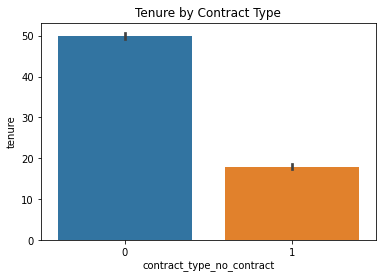

In [22]:
# p value of 0.0000, we reject our null hypothesis that they are independent

# Help visualize this by looking at average tenure length between contract types
plt.title("Tenure by Contract Type")
sns.barplot(x="contract_type_no_contract", y="tenure", data=wrangled_telco)
plt.show()

In [23]:
# Does partner status impact length of tenure.
# Verify mathematically that whether or not customer has a partner is not independent of tenure
# Null Hypothesis - Partner status is independent of Churn

telco_partner_churn_observed = pd.crosstab(wrangled_telco.churn, wrangled_telco.partner)
telco_partner_churn_observed

partner,0,1
churn,,
No,2441,2733
Yes,1200,669


In [24]:
chi2, p, degf, expected = stats.chi2_contingency(telco_partner_churn_observed)

print('Observed\n')
print(telco_partner_churn_observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2441 2733]
 [1200  669]]
---
Expected

[[2674.78830044 2499.21169956]
 [ 966.21169956  902.78830044]]
---

chi^2 = 158.7334
p     = 0.0000


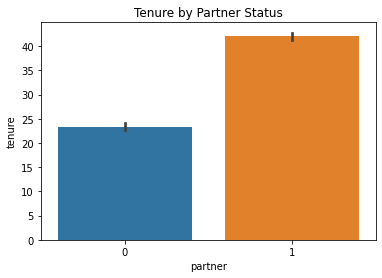

In [25]:
# p value of 0.0000, we reject our null hypothesis that they are independent

# Help visualize this by looking at average tenure length between partner status
plt.title("Tenure by Partner Status")
sns.barplot(x="partner", y="tenure", data=wrangled_telco)
plt.show()

In [26]:
# Does payment type (manual vs. automatic) status impact length of tenure.
# Verify mathematically that whether or not customer has a partner is not independent of tenure
# Null Hypothesis - Payment type is independent of Churn

telco_payment_churn_observed = pd.crosstab(wrangled_telco.churn, wrangled_telco.payment_type_manual_payment)
telco_payment_churn_observed

payment_type_manual_payment,0,1
churn,,
No,2576,2598
Yes,490,1379


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(telco_payment_churn_observed)

print('Observed\n')
print(telco_payment_churn_observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2576 2598]
 [ 490 1379]]
---
Expected

[[2252.37597615 2921.62402385]
 [ 813.62402385 1055.37597615]]
---

chi^2 = 309.3486
p     = 0.0000


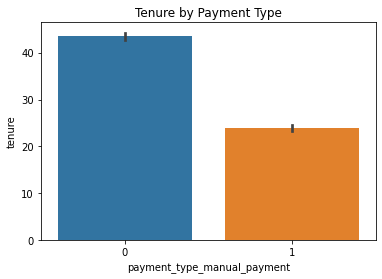

In [28]:
# p value of 0.0000, we reject our null hypothesis that they are independent

# Help visualize this by looking at average tenure length by payment type (automatic vs. manual)
plt.title("Tenure by Payment Type")
sns.barplot(x="payment_type_manual_payment", y="tenure", data=wrangled_telco)
plt.show()

In [29]:
telco_internet_churn_observed = pd.crosstab(wrangled_telco.churn, wrangled_telco.internet_service_type_None)
telco_internet_churn_observed

internet_service_type_None,0,1
churn,,
No,3761,1413
Yes,1756,113


In [30]:
chi2, p, degf, expected = stats.chi2_contingency(telco_internet_churn_observed)

print('Observed\n')
print(telco_internet_churn_observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3761 1413]
 [1756  113]]
---
Expected

[[4052.95442283 1121.04557717]
 [1464.04557717  404.95442283]]
---

chi^2 = 364.5198
p     = 0.0000


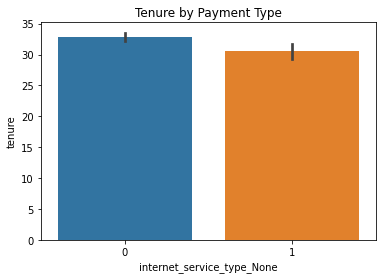

In [31]:
# p value of 0.0000, we reject our null hypothesis that they are independent

# Help visualize this by looking at average tenure length by whether or not they have internet service
# Note that the difference between having internet service and not having internet service is not nearly as 
# drastic as with the other questions we asked.

plt.title("Tenure by Payment Type")
sns.barplot(x="internet_service_type_None", y="tenure", data=wrangled_telco)
plt.show()

In [32]:
# cols_to_drop = ['churn', 'baseline_prediction', 'total_charges', 'monthly_charges', 'internet_service_type_Fiber optic', 'internet_service_type_None']

cols_to_drop = ['churn', 'total_charges', 'monthly_charges']

X_train = train.drop(columns=cols_to_drop)
y_train = train.churn

X_validate = validate.drop(columns=cols_to_drop)
y_validate = validate.churn

X_test = test.drop(columns=cols_to_drop)
y_test = test.churn

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   senior_citizen               3943 non-null   int64 
 1   partner                      3943 non-null   object
 2   tenure                       3943 non-null   int64 
 3   gender_Male                  3943 non-null   uint8 
 4   dependents_Yes               3943 non-null   uint8 
 5   phone_service_Yes            3943 non-null   uint8 
 6   contract_type_no_contract    3943 non-null   uint8 
 7   internet_service_type_Fiber  3943 non-null   uint8 
 8   internet_service_type_None   3943 non-null   uint8 
 9   payment_type_manual_payment  3943 non-null   uint8 
dtypes: int64(2), object(1), uint8(7)
memory usage: 150.2+ KB


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=6, random_state=123)

In [36]:
clf = clf.fit(X_train, y_train)

In [37]:
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('churn_decision_tree', view=True)

'churn_decision_tree.pdf'

In [38]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [39]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [40]:
confusion_matrix(y_train, y_pred)

array([[2574,  323],
       [ 449,  597]])

In [41]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2574,323
Yes,449,597


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      2897
         Yes       0.65      0.57      0.61      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.73      0.74      3943
weighted avg       0.80      0.80      0.80      3943



In [43]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.78


In [44]:
for i in range(2, 30):
    clf = DecisionTreeClassifier(max_depth=i, random_state=123)
    clf = clf.fit(X_train, y_train)
    print('Decision Tree Depth:', i)
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Decision Tree Depth: 2
Accuracy of Decision Tree classifier on training set: 0.76
Decision Tree Depth: 3
Accuracy of Decision Tree classifier on training set: 0.79
Decision Tree Depth: 4
Accuracy of Decision Tree classifier on training set: 0.80
Decision Tree Depth: 5
Accuracy of Decision Tree classifier on training set: 0.80
Decision Tree Depth: 6
Accuracy of Decision Tree classifier on training set: 0.80
Decision Tree Depth: 7
Accuracy of Decision Tree classifier on training set: 0.81
Decision Tree Depth: 8
Accuracy of Decision Tree classifier on training set: 0.82
Decision Tree Depth: 9
Accuracy of Decision Tree classifier on training set: 0.83
Decision Tree Depth: 10
Accuracy of Decision Tree classifier on training set: 0.85
Decision Tree Depth: 11
Accuracy of Decision Tree classifier on training set: 0.86
Decision Tree Depth: 12
Accuracy of Decision Tree classifier on training set: 0.87
Decision Tree Depth: 13
Accuracy of Decision Tree classifier on training set: 0.89
Decision Tre

In [45]:
# Try a basic KNN
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [49]:
y_pred = knn.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [50]:
confusion_matrix(y_train, y_pred)

array([[2698,  199],
       [ 426,  620]])

In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.90      2897
         Yes       0.76      0.59      0.66      1046

    accuracy                           0.84      3943
   macro avg       0.81      0.76      0.78      3943
weighted avg       0.84      0.84      0.83      3943



In [52]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.73


In [53]:
for i in range(2, 8):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    print('Number of Neighbors:', i)
    print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Number of Neighbors: 2
Accuracy of KNN classifier on training set: 0.83
Number of Neighbors: 3
Accuracy of KNN classifier on training set: 0.84
Number of Neighbors: 4
Accuracy of KNN classifier on training set: 0.82
Number of Neighbors: 5
Accuracy of KNN classifier on training set: 0.83
Number of Neighbors: 6
Accuracy of KNN classifier on training set: 0.82
Number of Neighbors: 7
Accuracy of KNN classifier on training set: 0.82


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(max_depth=3, 
                            random_state=123)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [57]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [58]:
y_pred = rf.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [59]:
confusion_matrix(y_train, y_pred)

array([[2765,  132],
       [ 695,  351]])

In [60]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.95      0.87      2897
         Yes       0.73      0.34      0.46      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.64      0.66      3943
weighted avg       0.78      0.79      0.76      3943



In [61]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


In [62]:
for i in range(3, 20):
    rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=i, 
                            random_state=123)
    rf.fit(X_train, y_train)
    print('Max Depth:', i)
    print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Max Depth: 3
Accuracy of random forest classifier on training set: 0.79
Max Depth: 4
Accuracy of random forest classifier on training set: 0.80
Max Depth: 5
Accuracy of random forest classifier on training set: 0.80
Max Depth: 6
Accuracy of random forest classifier on training set: 0.80
Max Depth: 7
Accuracy of random forest classifier on training set: 0.81
Max Depth: 8
Accuracy of random forest classifier on training set: 0.82
Max Depth: 9
Accuracy of random forest classifier on training set: 0.82
Max Depth: 10
Accuracy of random forest classifier on training set: 0.83
Max Depth: 11
Accuracy of random forest classifier on training set: 0.84
Max Depth: 12
Accuracy of random forest classifier on training set: 0.84
Max Depth: 13
Accuracy of random forest classifier on training set: 0.84
Max Depth: 14
Accuracy of random forest classifier on training set: 0.84
Max Depth: 15
Accuracy of random forest classifier on training set: 0.84
Max Depth: 16
Accuracy of random forest classifier on trai

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='saga')

In [65]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123, solver='saga')

In [66]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [67]:
y_pred = logit.predict(X_train)
y_pred[0:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [68]:
confusion_matrix(y_train, y_pred)

array([[2593,  304],
       [ 500,  546]])

In [69]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      2897
         Yes       0.64      0.52      0.58      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.71      0.72      3943
weighted avg       0.79      0.80      0.79      3943



In [70]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


In [71]:
for i in ['sag', 'liblinear', 'newton-cg', 'saga', 'lbfgs']:
    logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver=i)
    logit.fit(X_train, y_train)
    print('Solver is:', i)
    print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Solver is: sag
Accuracy of Logistic Regression classifier on training set: 0.79
Solver is: liblinear
Accuracy of Logistic Regression classifier on training set: 0.79
Solver is: newton-cg
Accuracy of Logistic Regression classifier on training set: 0.79
Solver is: saga
Accuracy of Logistic Regression classifier on training set: 0.80
Solver is: lbfgs
Accuracy of Logistic Regression classifier on training set: 0.79
